IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

DATASET READING

In [ ]:
df = pd.read_csv('/content/Financials.csv')

In [ ]:
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014


In [ ]:
#check the shape
df.shape

(700, 16)

In [ ]:
#checking the null values
df.isnull().sum()

In [ ]:
#checking Head
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [ ]:
#checking tail
df.tail()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014
699,Channel Partners,United States of America,VTT,High,"$1,806.00",$250.00,$12.00,"$21,672.00","$3,250.80","$18,421.20","$5,418.00","$13,003.20",01/05/2014,5,May,2014


In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [ ]:
#describing the columns
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [ ]:
#List of columns to clean
columns_to_clean = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

Columns ('Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit') cosist of "$" sign so we are cleaning them.

BY USING PARANTHESES

In [ ]:
def convert_parentheses(val):
    if isinstance(val, str):
        if val.startswith('(') and val.endswith(')'):
            return -float(val[1:-1].replace(',', ''))
        else:
            return float(val)
    else:
        return val

In [ ]:
for col in columns_to_clean:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('$', '').str.replace('-', '').str.replace(',', '').str.strip()
        df[col] = df[col].replace('', np.nan).apply(convert_parentheses).astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,2014-01-06,6,June,2014


WE HAVE REPLACED $ TO EXECUTE EASILY.

In [ ]:
#Describing the Discounts column
df['Discounts'].describe()

count       647.000000
mean      14227.586198
std       23562.833079
min          18.410000
25%        1061.000000
50%        3108.000000
75%       18809.250000
max      149677.500000
Name: Discounts, dtype: float64

WE ARE ANALYSING THE FOLLOWING TERMS WITH DIFFERENT PLOT

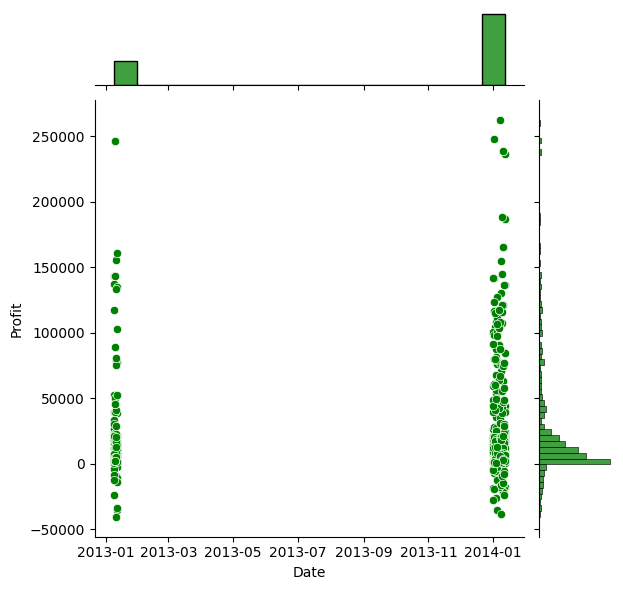

In [ ]:
#by using joint plot
sns.jointplot(y='Profit',x='Date',data=df,color='green')

On 2014/01 we got huge profit with an average  value of 150K.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '3.0'),
  Text(1, 0, '5.0'),
  Text(2, 0, '10.0'),
  Text(3, 0, '120.0'),
  Text(4, 0, '250.0'),
  Text(5, 0, '260.0')])

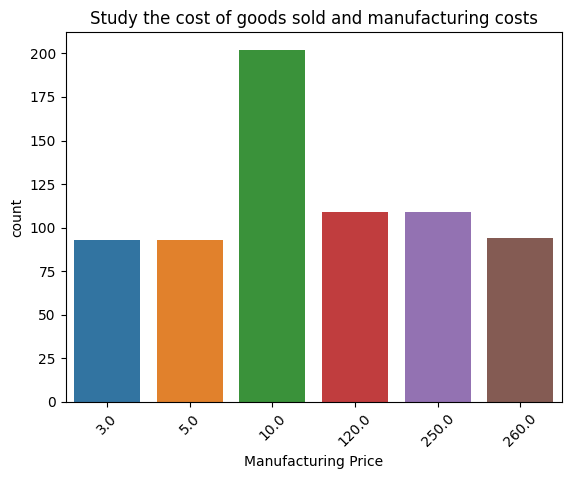

In [ ]:
#By using Countplot Studying the cost of goods sold and manufacturing costs
sns.countplot(x='Manufacturing Price',data=df)
plt.title('Study the cost of goods sold and manufacturing costs')
plt.xticks(rotation=45)

The average Manufacturing Price of a Product is 10.

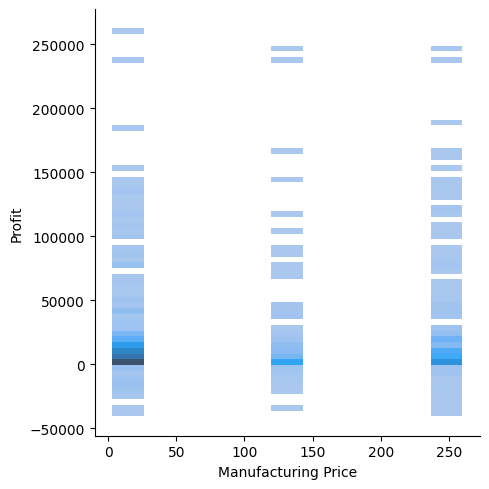

In [ ]:
#BY USING DISPLOT WE PLOTTING
sns.displot(x='Manufacturing Price',y='Profit',data=df)

In Between 0-50 we gets more Profit with maximum sales.

<Axes: xlabel='Product', ylabel='Profit'>

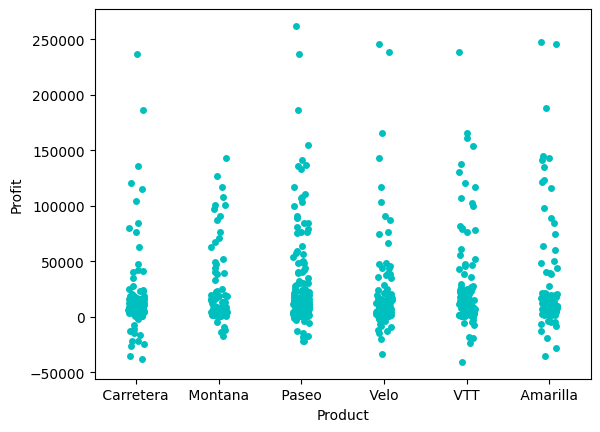

In [ ]:
#BY USING STRIPPERPLOT WE ARE PLOTTING
sns.stripplot(y='Profit',x='Product',data=df,color='c')

The PRODUCT(Montana) gives us profit compare to  another type of PRODUCT(Carretera,Paseo, Velo, VTT, Amerilla).
The PRODUCT(Carretera,Paseo, Velo, VTT, Amerilla) us loses and also profit (peak times) as per situtional factors.

**BY** USING GROUPBY FUNCTIONS WE ARE CATEGORISING THE FOLLOWING TERMS AS PER THE NORMS

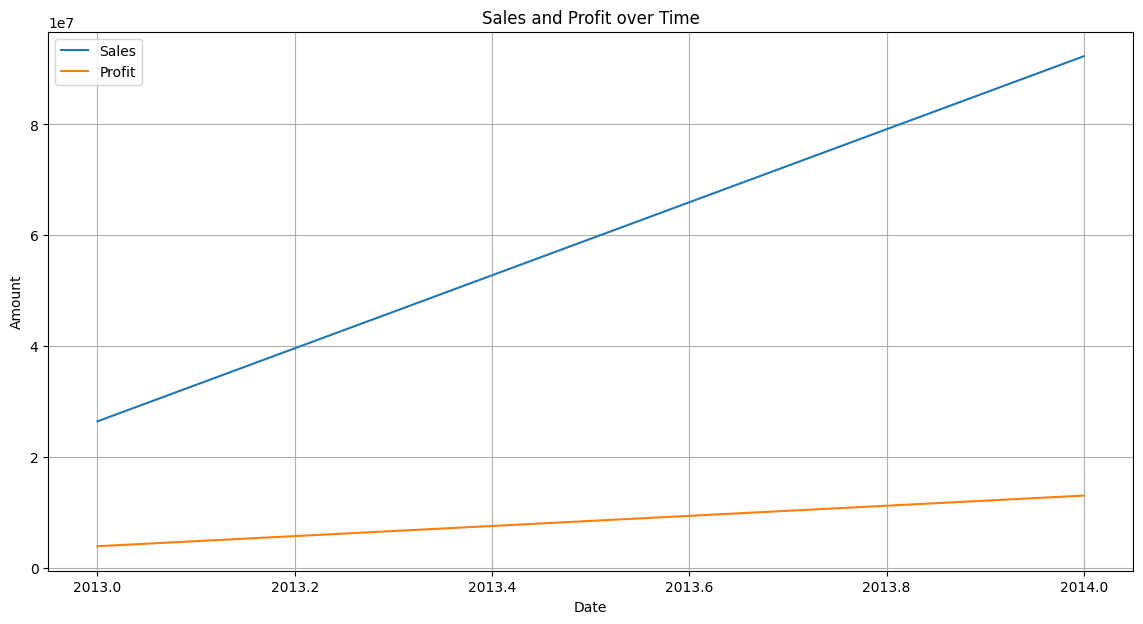

In [ ]:
grouped_df = df.groupby('Year').agg({'Sales': 'sum', 'Profit': 'sum'})
plt.figure(figsize=(14, 7))
plt.plot(grouped_df.index, grouped_df['Sales'], label='Sales')
plt.plot(grouped_df.index, grouped_df['Profit'], label='Profit')
plt.title('Sales and Profit over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()

Sales and Profit have been uniformly increased.

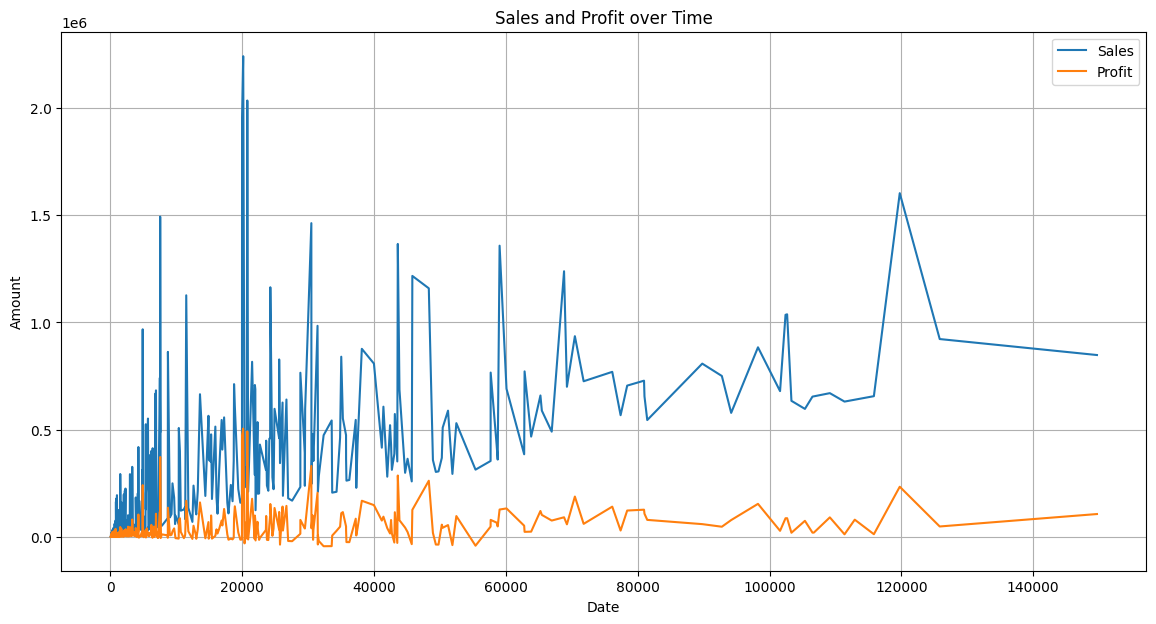

In [ ]:
grouped_df = df.groupby('Discounts').agg({'Sales': 'sum', 'Profit': 'sum'})
plt.figure(figsize=(14, 7))
plt.plot(grouped_df.index, grouped_df['Sales'], label='Sales')
plt.plot(grouped_df.index, grouped_df['Profit'], label='Profit')
plt.title('Sales and Profit over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()

Discounts has been showed a huge change in sales varies a range of 0-20K.

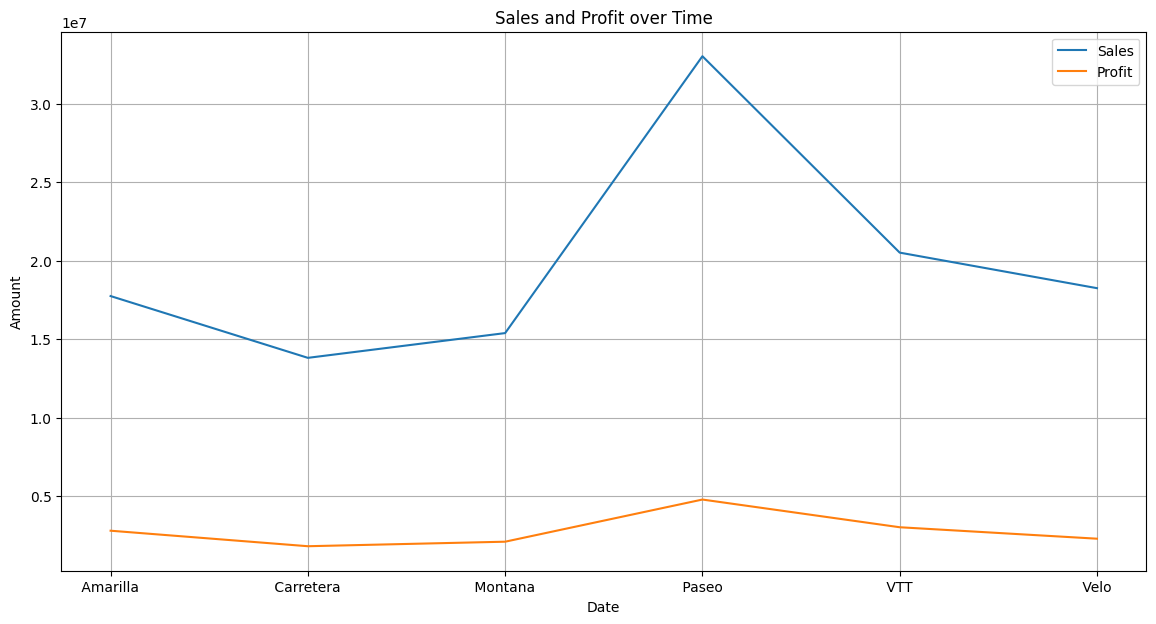

In [ ]:
grouped_df = df.groupby('Product').agg({'Sales': 'sum', 'Profit': 'sum'})
plt.figure(figsize=(14, 7))
plt.plot(grouped_df.index, grouped_df['Sales'], label='Sales')
plt.plot(grouped_df.index, grouped_df['Profit'], label='Profit')
plt.title('Sales and Profit over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()

Product 'Paseo' have huges sales nd profits.

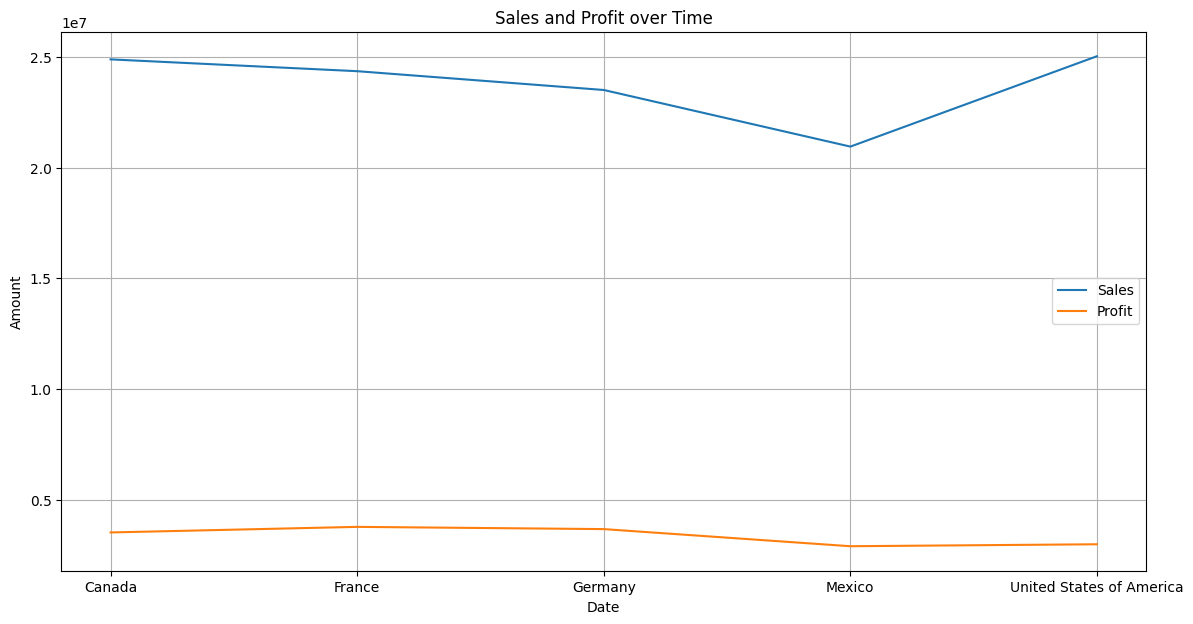

In [ ]:
grouped_df = df.groupby('Country').agg({'Sales': 'sum', 'Profit': 'sum'})
plt.figure(figsize=(14, 7))
plt.plot(grouped_df.index, grouped_df['Sales'], label='Sales')
plt.plot(grouped_df.index, grouped_df['Profit'], label='Profit')
plt.title('Sales and Profit over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()

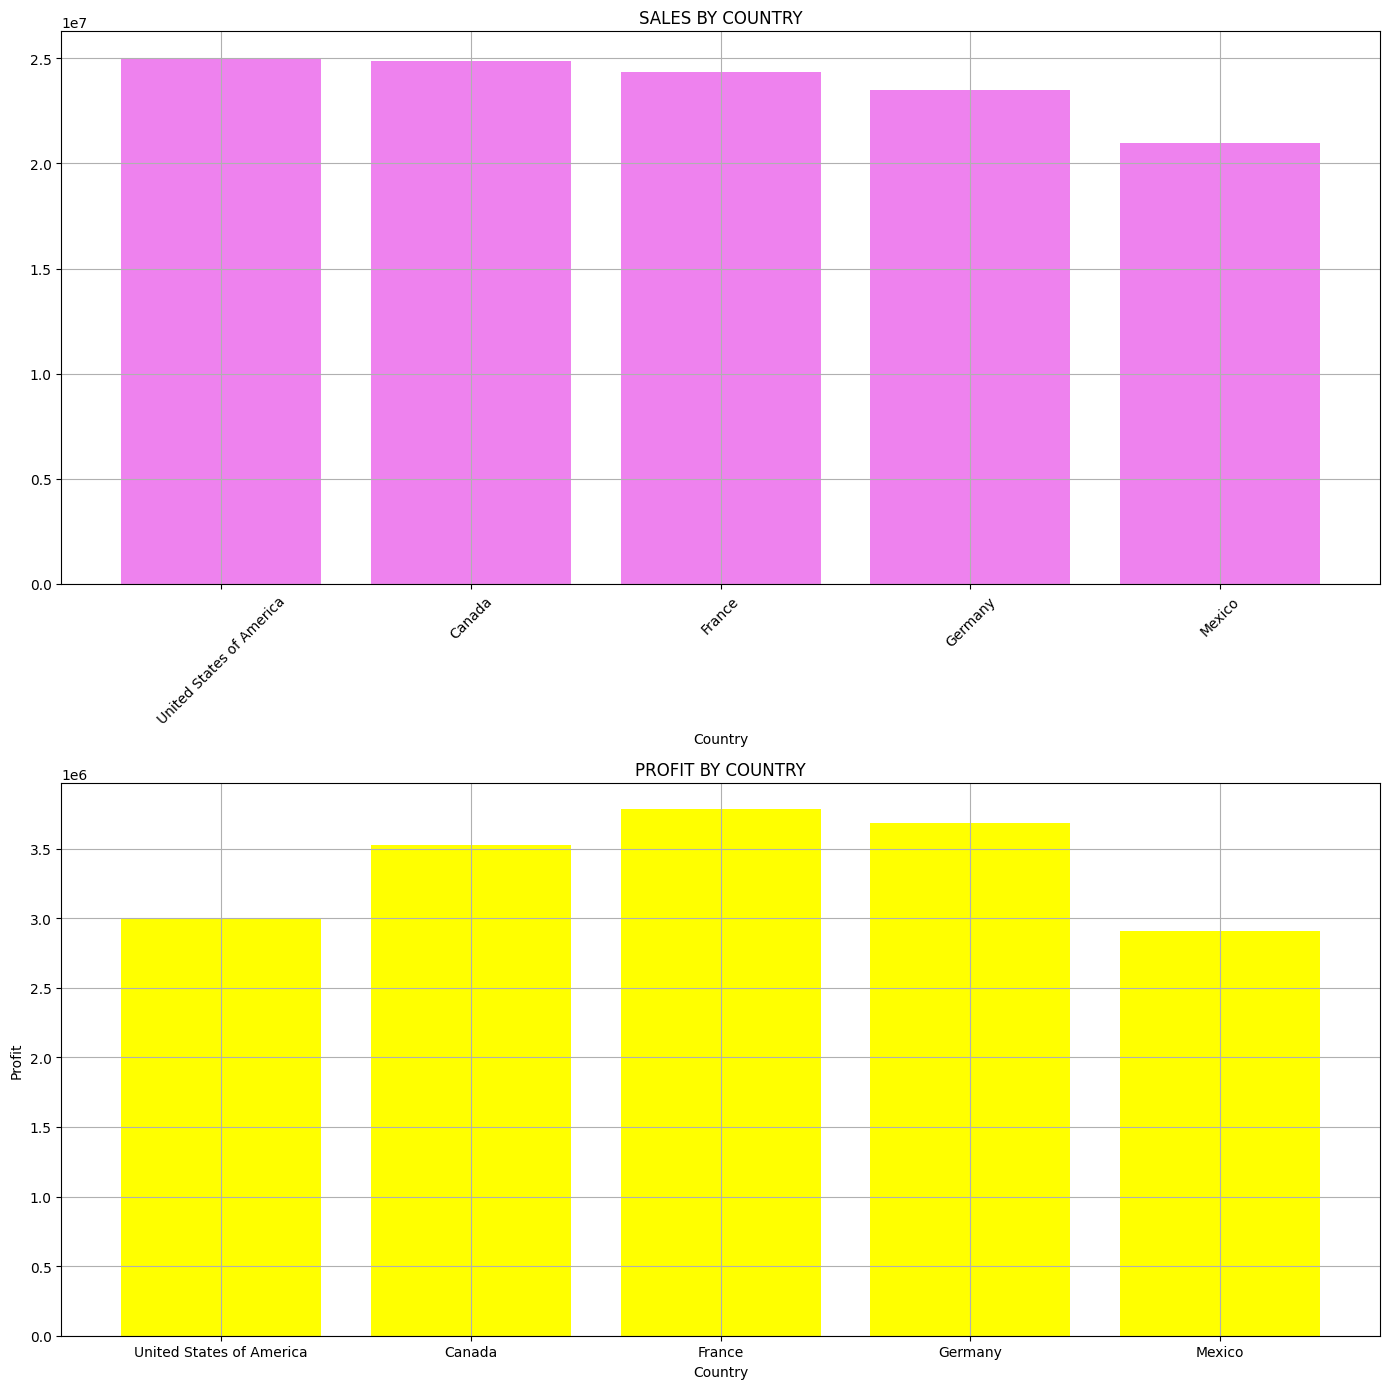

In [ ]:
grouped_country = df.groupby('Country').agg({'Sales': 'sum', 'Profit': 'sum'})

# Sort data by Sales
grouped_country = grouped_country.sort_values(by='Sales', ascending=False)

# Plot Sales and Profit by Country
fig, sr = plt.subplots(2, 1, figsize=(14, 14))

sr[0].bar(grouped_country.index, grouped_country['Sales'], color='violet')
sr[0].set_title('SALES BY COUNTRY')
sr[0].set_xlabel('Country')
sr[0].tick_params(axis='x', rotation=45)
sr[0].grid()

sr[1].bar(grouped_country.index, grouped_country['Profit'], color='yellow')
sr[1].set_title('PROFIT BY COUNTRY')
sr[1].set_xlabel('Country')
sr[1].set_ylabel('Profit')
sr[1].grid()
plt.tight_layout()
plt.show()

We observed 'USA' has huge Sales.
We observed 'France' has huge Sales.

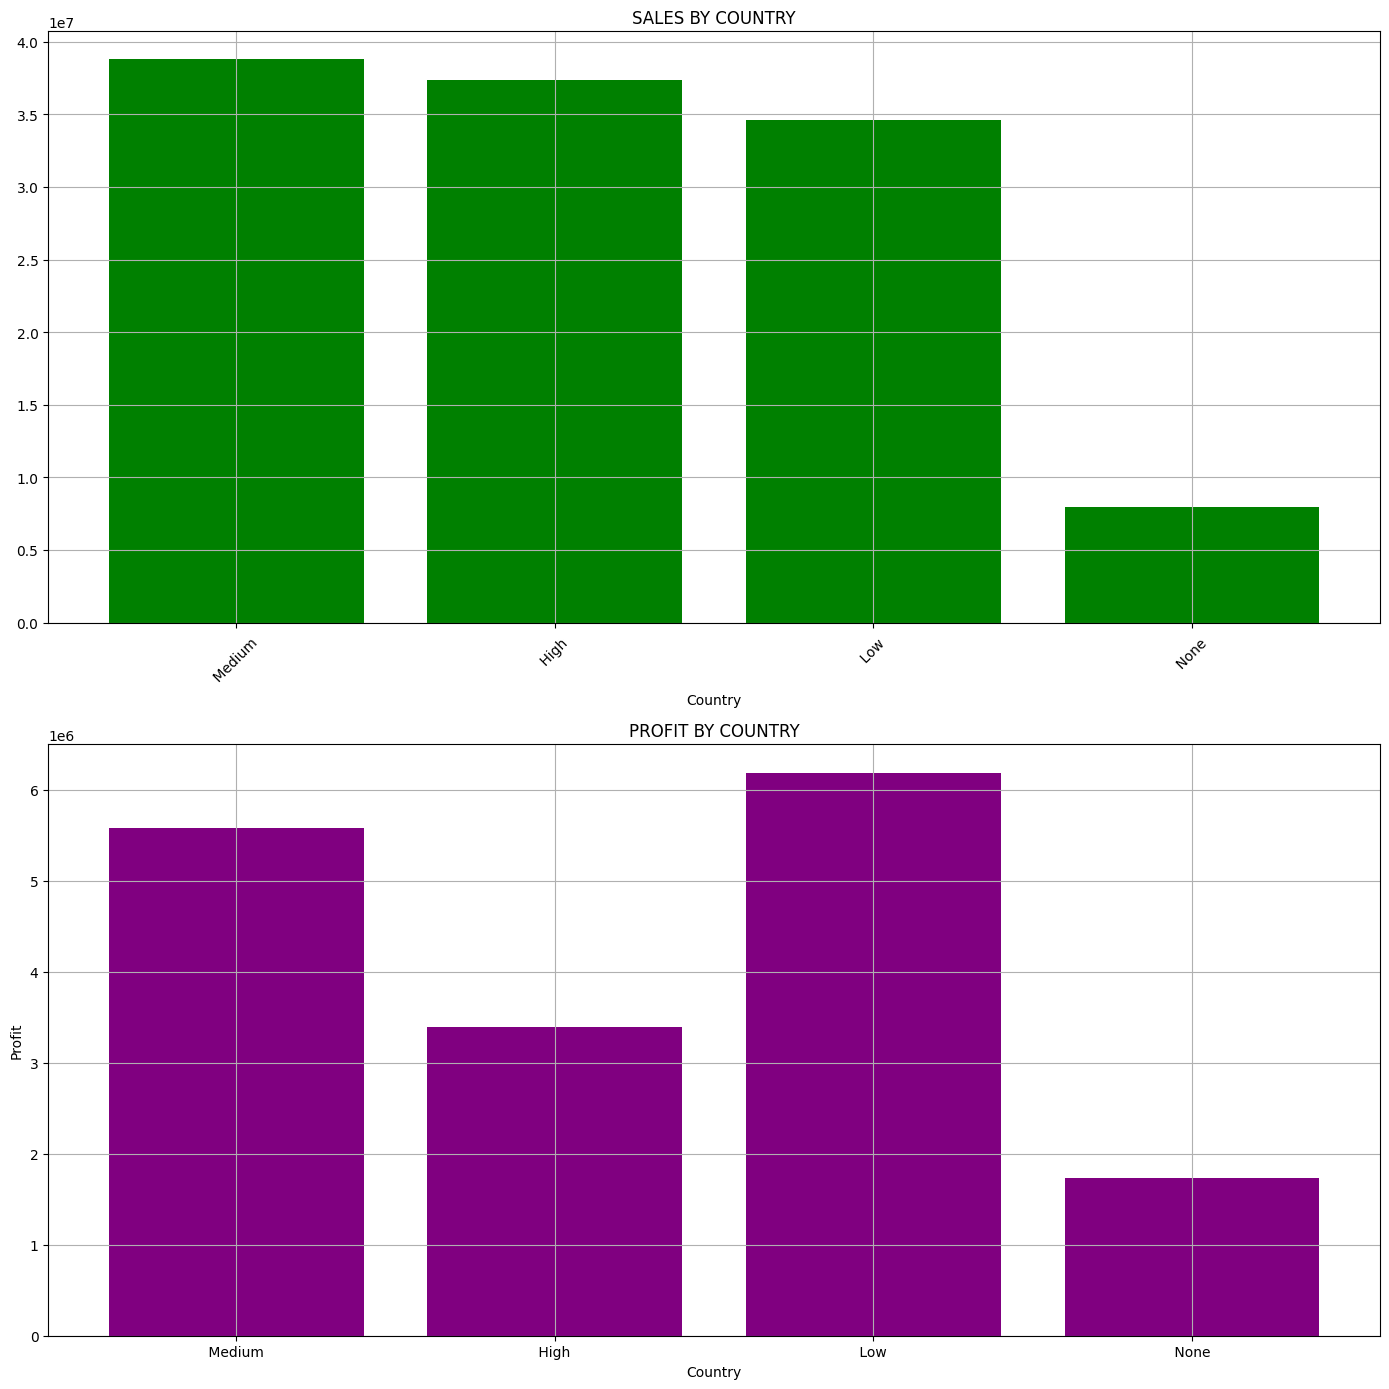

In [ ]:
grouped_country = df.groupby('Discount Band').agg({'Sales': 'sum', 'Profit': 'sum'})

# Sort data by Sales
grouped_country = grouped_country.sort_values(by='Sales', ascending=False)

# Plot Sales and Profit by Country
fig, sr = plt.subplots(2, 1, figsize=(14, 14))

sr[0].bar(grouped_country.index, grouped_country['Sales'], color='green')
sr[0].set_title('SALES BY COUNTRY')
sr[0].set_xlabel('Country')
sr[0].tick_params(axis='x', rotation=45)
sr[0].grid()

sr[1].bar(grouped_country.index, grouped_country['Profit'], color='purple')
sr[1].set_title('PROFIT BY COUNTRY')
sr[1].set_xlabel('Country')
sr[1].set_ylabel('Profit')
sr[1].grid()
plt.tight_layout()
plt.show()

We obeserved the 'Discount Band' has rapid changes in sales.

In [ ]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,2014-01-06,6,June,2014


In [ ]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [ ]:
df1 = df[['Date', 'Sales']].sort_values('Date')

In [ ]:
df1['Date']=pd.to_datetime(df1['Date'])


In [ ]:
df1

,Date,Sales
202,2013-01-09,50803.20
626,2013-01-09,109972.50
336,2013-01-09,40887.45
179,2013-01-09,14131.20
523,2013-01-09,8744.25
...,...,...
511,2014-01-12,28795.95
164,2014-01-12,206852.50
163,2014-01-12,156048.75
44,2014-01-12,36340.00


In [ ]:
pip install prophet

In [ ]:
!pip install fbprophet

In [ ]:
!pip install pystan==2.19.1.1

In [ ]:
from fbprophet import Prophet

In [ ]:
# Prepare the data for Prophet
prophet_data = df1[['Date', 'Sales']]
prophet_data.columns = ['ds', 'y']  # Rename columns for Prophet

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(prophet_data)

# Create a dataframe with future dates for forecasting
future = model.make_future_dataframe(periods=365)  # Adjust the number of periods based on your forecasting needs

# Generate forecasts
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Sales Forecasting with Prophet')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
df1.Date.nunique()

16

In [ ]:
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.00,21780.0,10890.00,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.00,8880.0,4440.00,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.00,24700.0,12350.00,2014-01-06,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,2014-01-03,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,2014-01-10,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,2014-01-02,2,February,2014
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,2014-01-04,4,April,2014


Month-to-Month Variations

In [ ]:
plt.figure(figsize=(12, 6))
monthly_data= df.groupby(['Year', 'Month Name'])[['Sales']].agg({'Sales': 'mean'})



<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.plot(monthly_data['Month Name'],monthly_data['Sales'], label='Monthly Sales', marker='o')

plt.title('Monthly Variations in Sales, Revenue, and Profit')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()